In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
titanic = pd.read_csv("tested.csv")

In [5]:
titanic[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
titanic = titanic.drop(["PassengerId", "Name", "Cabin","Ticket"], axis=1)

In [7]:
titanic[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [8]:
X = titanic.drop(["Survived"], axis=1)

In [9]:
X[:3]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q


In [10]:
y = titanic["Survived"]

In [11]:
y[:3]

0    0
1    1
2    0
Name: Survived, dtype: int64

In [12]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [13]:
titanic.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [14]:
X["Age"] = X["Age"].fillna(titanic["Age"].median())
X["Embarked"] = X["Embarked"].fillna(titanic["Embarked"].mode()[0])
X["Fare"] = X["Fare"].fillna(titanic["Fare"].median())


In [15]:
titanic[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [16]:
titanic.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [17]:
X = pd.get_dummies(X, columns=["Sex", "Embarked"], drop_first=False)

In [18]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,False,True,False,False,True
414,1,39.0,0,0,108.9000,True,False,True,False,False
415,3,38.5,0,0,7.2500,False,True,False,False,True
416,3,27.0,0,0,8.0500,False,True,False,False,True


In [19]:
y[:3
  ]

0    0
1    1
2    0
Name: Survived, dtype: int64

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X

array([[ 0.87348191,  0.38623105, -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       [ 0.87348191,  1.37137004,  0.61699237, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [-0.31581919,  2.55353683, -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       ...,
       [ 0.87348191,  0.70147553, -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191, -0.20485235, -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191, -0.20485235,  0.61699237, ...,  1.76012477,
        -0.35164743, -1.35067551]], shape=(418, 10))

In [22]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

In [23]:
X.shape

torch.Size([418, 10])

In [24]:
y.shape

torch.Size([418, 1])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [26]:
X_train.shape

torch.Size([334, 10])

In [27]:
X_test.shape

torch.Size([84, 10])

In [28]:
y_train.split

<bound method Tensor.split of tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
    

In [43]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) 
    return acc

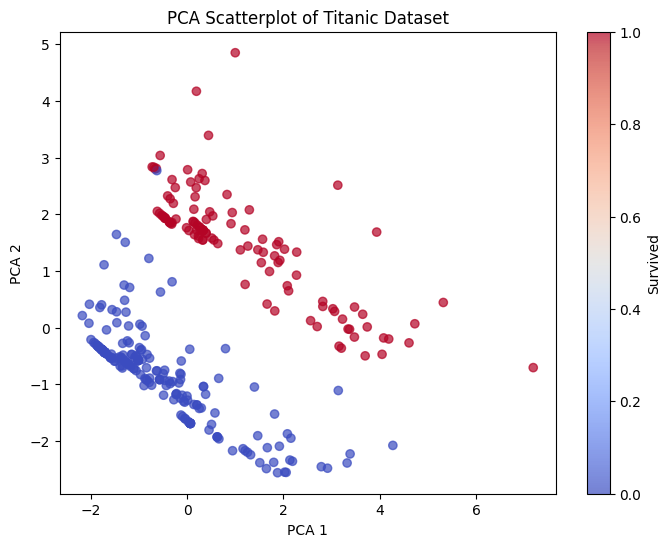

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y_train,
    cmap="coolwarm",
    alpha=0.7
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Scatterplot of Titanic Dataset")
plt.colorbar(label="Survived")
plt.show()

In [38]:
class TitanicModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=10, out_features=20)
        self.layer_2 = nn.Linear(in_features=20, out_features=20)
        self.layer_3 = nn.Linear(in_features=20, out_features=20)
        self.layer_4 = nn.Linear(in_features=20, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))    


In [39]:
model = TitanicModel()

In [40]:
model

TitanicModel(
  (layer_1): Linear(in_features=10, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=20, bias=True)
  (layer_4): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)

In [41]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [44]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model.train()

    y_logits = model(X_train)

    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


    if epoch % 100 == 0:
        print(f"Epoch:{epoch} Loss: {loss} Acc:{acc} Test loss {test_loss} Test acc{test_acc:.2%}")

Epoch:0 Loss: 2.7263047375214455e-10 Acc:1.0 Test loss 5.0580307303649263e-11 Test acc100.00%
Epoch:100 Loss: 2.7145999337285787e-10 Acc:1.0 Test loss 5.053388263398517e-11 Test acc100.00%
